### Generating dataset for training

 * test size = 25%
 * Convert categorical variable into dummy/indicator variables

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

def get_Titanic_df():
    # Get csv
    df_train = pd.read_csv("../dataset/train.csv")
    df_test = pd.read_csv("../dataset/test.csv")
    # Data Cleaning
    df_train = df_train.drop(columns=['Cabin'])
    df_test  = df_test.drop(columns=['Cabin'])
    df_train = df_train.fillna(df_train.mean())
    df_test  = df_test.fillna(df_train.mean())
    return df_train, df_test

# Generate testing Set
def train_test_Titanic(df, test_percent):
    from sklearn.model_selection import train_test_split
    col_names = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
    X = pd.get_dummies(df.loc[:,col_names])
    y = df.loc[:,'Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_percent)
    return X_train, X_test, y_train, y_test

df_train, df_test = get_Titanic_df()
X_train, X_test, y_train, y_test = train_test_Titanic(df_train, 0.25)

## Model 1 - Tree based method: Decision Tree Deafault

 * Decision Tree with Default config: Score = 0.73205

In particular tree based methods require little data preparation.

Also, Random Forest let identift features that are significantly more discriminative than others.

In [27]:
## Test 1 Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini'
                            ,splitter='best'
                            ,random_state=1
                            ,min_impurity_decrease=0
                            #,max_depth=14
                            )

clf.fit(X_train, y_train)
importances = clf.feature_importances_
print("DecisionTreeClassifier Accuracy = {0}".format(clf.score(X_test,y_test)))

def get_test_X(df):
    col_names = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
    X = df.loc[:,col_names]
    X = pd.get_dummies(X)
    X.head()
    return X

#### Exporting Results
def exporting_results(clf, filename):
    X_kaggle = get_test_X(df_test)
    y_pred = clf.predict(X_kaggle)
    df = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':y_pred})
    df.head()
    df.to_csv('../results/{0}'.format(filename),index=False)
    return df

df = exporting_results(clf,'python_decisiontree_default.csv')

ValueError: Found array with 0 sample(s) (shape=(0, 10)) while a minimum of 1 is required.

### Plot Feature Importance

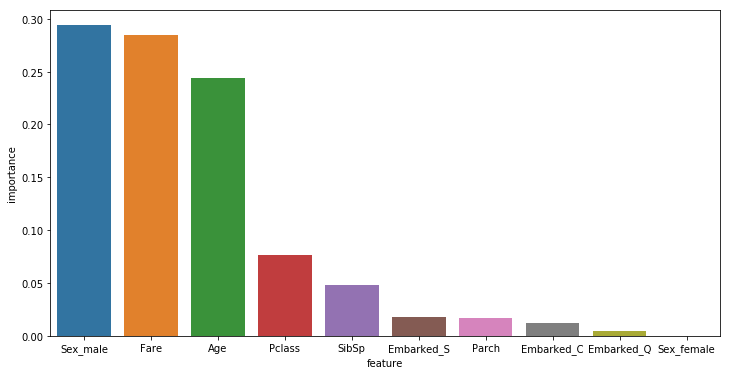

In [24]:
def plot_decisionTree_feature_impiortance(clf):
    import matplotlib.pyplot as plt
    %matplotlib inline
    fig = plt.figure(figsize=(12,6))
    df_importances = pd.DataFrame({'feature':X_train.columns.values,'importance':importances})
    df_importances = df_importances.sort_values(by=['importance'],ascending=False)
    sns.barplot(x='feature'
                ,y='importance'
                ,data=df_importances
               )

plot_decisionTree_feature_impiortance(clf)

### Plot main tree

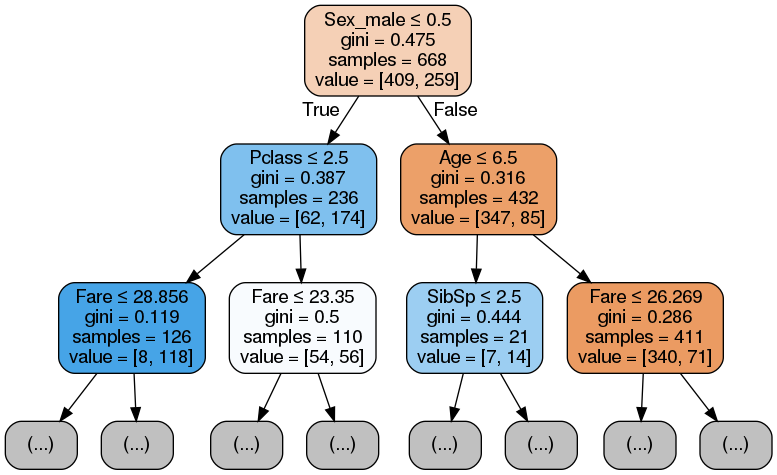

In [25]:
def plot_tree(clf):
    from sklearn.tree import export_graphviz
    import pydotplus
    from IPython.display import Image 
    dot_data = export_graphviz(clf,
                               out_file=None,  
                               filled=True,
                               rounded=True,
                               special_characters=True,
                              feature_names=X_train.columns.values,
                              max_depth=2)
    graph = pydotplus.graph_from_dot_data(dot_data)  
    return Image(graph.create_png())
    
plot_tree(clf)

## Model 2 - Tree based method: Decision Tree with Grid Search

In [26]:
X_train, X_test, y_train, y_test = train_test_Titanic(df_train, 0)

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.grid_search import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier()
                   ,tree_para
                   ,cv=5 
                   ,scoring='accuracy')
clf.fit(X_train, y_train)
print('Best Params : {0}'.format(clf.best_params_))
print('Best Score  : {0}'.format(clf.best_score_))

df = exporting_results(clf,'python_decisiontree_GridSearch.csv')

Best Params : {'criterion': 'entropy', 'max_depth': 6}
Best Score  : 0.8181818181818182


## Model 3 - Random Forest